In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

def mlp(r_i, r_d, N_i, N_h, N_o, training_steps=5000, lr=0.7, batch_size=1):

    # Initialize randomly the weights
    # Hidden layer
    w_h = np.random.rand(N_h+1,N_i) - 0.5
    # Output layer
    w_o=np.random.rand(N_o,N_h+1) - 0.5

    mse = []

    for ti in range(training_steps):
        # Select training pattern randomly
        #i = np.floor(4*np.random.rand()).astype('int')
        for bi in range(batch_size):
            # Feed-forward the input to hidden layer
            i = np.floor(np.shape(r_i)[1]*np.random.rand()).astype('int')
            r_h = 1 / (1 + np.exp(-w_h*r_i[:,i]))
            r_h[-1] = 1  # Bias from hidden to output layer
            #r_h = np.concatenate((r_h, np.ones((1,1))), axis=0)
            # Feed-forward the input to the output layer
            r_o = 1 / (1 + np.exp(-w_o*r_h))
            # Calculate the network error
            d_o = np.multiply(np.multiply(r_o, 1-r_o), r_d[:,i] - r_o)
            # Calculate the responsability of the hidden network in the error
            d_h = np.multiply(np.multiply(r_h, (1-r_h)), (w_o.T*d_o))
            # Update weights
            w_o = w_o + lr*(r_h*d_o.T).T
            w_h = w_h + lr*(r_i[:,i]*d_h.T).T
            
        # Test all patterns
        #r_o_test = 1 / (1 + np.exp(-w_o*(1/(1+np.exp(-w_h*r_i)))))
        rht = 1 / (1 + np.exp(-w_h*r_i))
        rht[-1] = 1
        r_o_test = 1 / (1 + np.exp(-w_o*rht))
        mse += [mean_squared_error(r_d, r_o_test)]
        
    return mse, r_o_test, w_h, w_o

![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Iris_dataset_scatterplot.svg/1024px-Iris_dataset_scatterplot.svg.png)

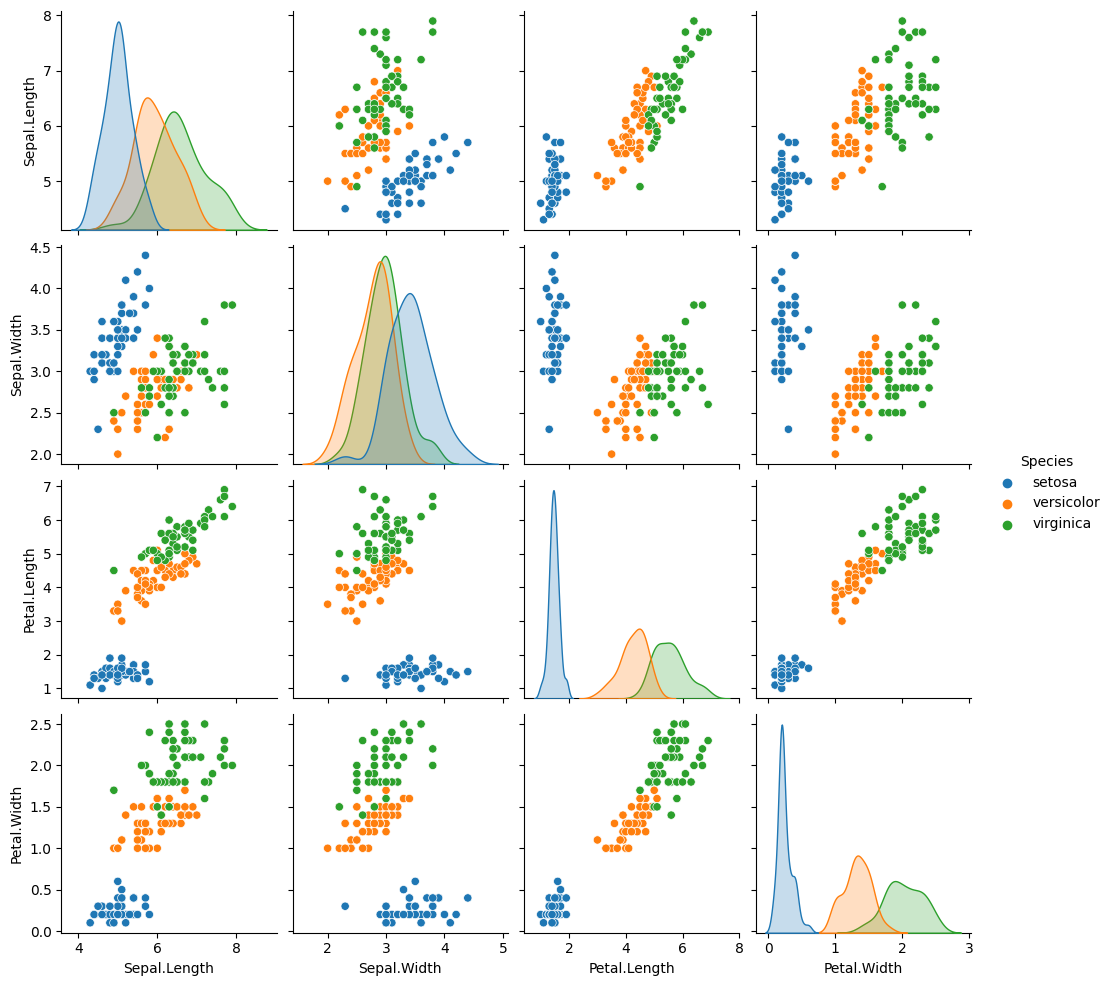

In [ ]:
import pandas as pd
iris = pd.read_csv("https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/iris.csv", 
    index_col=0)
sns.pairplot(iris, hue="Species", diag_kind="kde")

Text(0, 0.5, 'Petal Width')

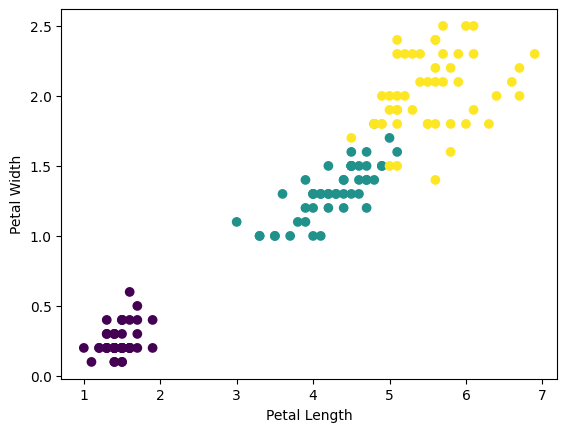

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, 2:4]  # Feature selection Petal Length, Petal Width
y = iris.target
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

In [ ]:
X[:5], y[:5], len(y), np.unique(y, return_counts=True)

(array([[1.4, 0.2],
        [1.4, 0.2],
        [1.3, 0.2],
        [1.5, 0.2],
        [1.4, 0.2]]),
 array([0, 0, 0, 0, 0]),
 150,
 (array([0, 1, 2]), array([50, 50, 50])))

<BarContainer object of 3 artists>

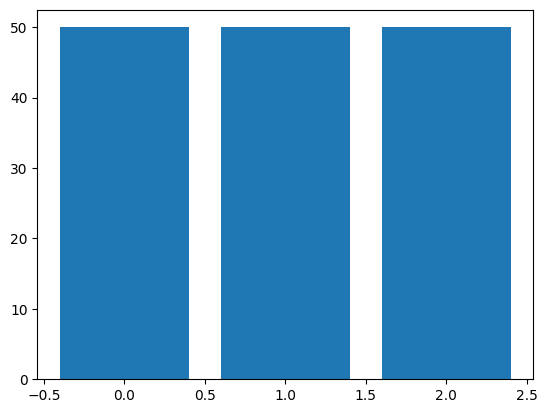

In [ ]:
plt.bar(*np.unique(y, return_counts=True))

In [ ]:
clases = np.array([0, 1, 2])  # unique clases
y_cl = np.zeros((150,3), dtype = 'int')
for i, yi in enumerate(y):
    y_cl[i][np.where(clases == yi)[0]] = 1
    print(yi, np.where(clases == yi), y_cl[i])

0 (array([0]),) [1 0 0]
0 (array([0]),) [1 0 0]
0 (array([0]),) [1 0 0]
0 (array([0]),) [1 0 0]
0 (array([0]),) [1 0 0]
0 (array([0]),) [1 0 0]
0 (array([0]),) [1 0 0]
0 (array([0]),) [1 0 0]
0 (array([0]),) [1 0 0]
0 (array([0]),) [1 0 0]
0 (array([0]),) [1 0 0]
0 (array([0]),) [1 0 0]
0 (array([0]),) [1 0 0]
0 (array([0]),) [1 0 0]
0 (array([0]),) [1 0 0]
0 (array([0]),) [1 0 0]
0 (array([0]),) [1 0 0]
0 (array([0]),) [1 0 0]
0 (array([0]),) [1 0 0]
0 (array([0]),) [1 0 0]
0 (array([0]),) [1 0 0]
0 (array([0]),) [1 0 0]
0 (array([0]),) [1 0 0]
0 (array([0]),) [1 0 0]
0 (array([0]),) [1 0 0]
0 (array([0]),) [1 0 0]
0 (array([0]),) [1 0 0]
0 (array([0]),) [1 0 0]
0 (array([0]),) [1 0 0]
0 (array([0]),) [1 0 0]
0 (array([0]),) [1 0 0]
0 (array([0]),) [1 0 0]
0 (array([0]),) [1 0 0]
0 (array([0]),) [1 0 0]
0 (array([0]),) [1 0 0]
0 (array([0]),) [1 0 0]
0 (array([0]),) [1 0 0]
0 (array([0]),) [1 0 0]
0 (array([0]),) [1 0 0]
0 (array([0]),) [1 0 0]
0 (array([0]),) [1 0 0]
0 (array([0]),) 

In [ ]:
# One hot encoder
y_one_hot = np.zeros((len(y), 3))
for yi, yv in enumerate(y):
    y_one_hot[yi][yv] = 1
y_one_hot[-5:]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

(30, 120)

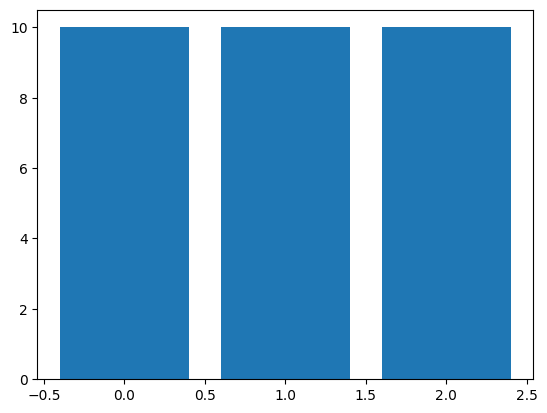

In [ ]:
index = list(range(len(y)))
np.random.shuffle(index)
test_prop = 0.2  # Test size
# train_size = 1 - test_size

test_size = int(test_prop*len(y))
train_size = len(y) - int(test_size*len(y))

y_test, y_train = y[index[:test_size]], y[index[test_size:]]

plt.bar(*np.unique(y_test, return_counts=True))
len(y_test), len(y_train)

<BarContainer object of 3 artists>

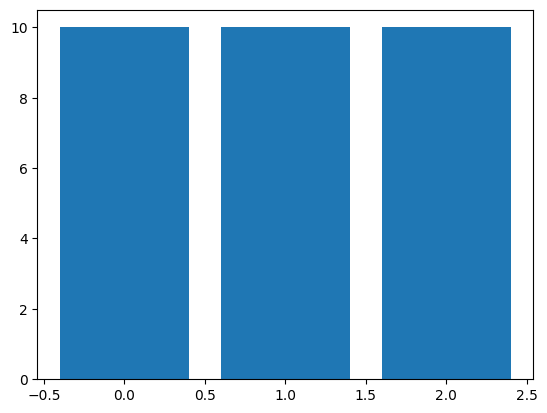

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
test_size=0.2, stratify=y, random_state=42)
plt.bar(*np.unique(y_test, return_counts=True))

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enconder = OneHotEncoder(handle_unknown='ignore')

mlp_enconding = enconder.fit_transform(y_train.reshape(-1, 1)).toarray()
mlp_enconding[:5]

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [ ]:
X_train = np.concatenate((X_train, np.ones((120,1))), axis=1)  # This the bias run once
r_i = np.matrix(X_train.transpose())  # X
r_d = np.matrix(mlp_enconding.transpose())  # y
X_train[:5]

array([[1.4, 0.2, 1. ],
       [4.5, 1.7, 1. ],
       [4.8, 1.4, 1. ],
       [1.5, 0.1, 1. ],
       [4. , 1.3, 1. ]])

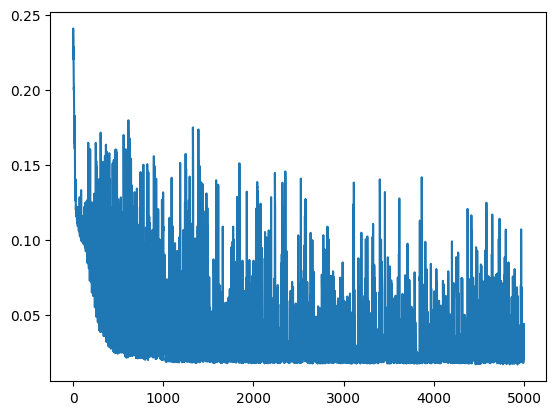

In [ ]:
N_i = 3; N_h = 2; N_o = 3 

result = mlp(r_i, r_d, N_i, N_h, N_o, training_steps=5000, lr=0.8, batch_size=10)
plt.plot(result[0])

### Scale the data

- Min max scaler

![](https://i.stack.imgur.com/EuitP.png)

In [ ]:
((X - X.min(axis=0))/(X.max(axis=0) - X.min(axis=0)))[:5], X[:5]

(array([[0.06779661, 0.04166667],
        [0.06779661, 0.04166667],
        [0.05084746, 0.04166667],
        [0.08474576, 0.04166667],
        [0.06779661, 0.04166667]]),
 array([[1.4, 0.2],
        [1.4, 0.2],
        [1.3, 0.2],
        [1.5, 0.2],
        [1.4, 0.2]]))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()  # Scale X between 0 and 1
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled[:5]


array([[0.06779661, 0.04166667],
       [0.06779661, 0.04166667],
       [0.05084746, 0.04166667],
       [0.08474576, 0.04166667],
       [0.06779661, 0.04166667]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = MinMaxScaler()  # Scale X between 0 and 1
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled = np.concatenate((X_train_scaled, np.ones((120,1))), axis=1)
r_i = np.matrix(X_train_scaled.transpose())  # X
r_d = np.matrix(mlp_enconding.transpose())  # y (label)
X_train_scaled[:5], np.shape(r_i), np.shape(r_d)

(array([[0.05172414, 0.04166667, 1.        ],
        [0.5862069 , 0.66666667, 1.        ],
        [0.63793103, 0.54166667, 1.        ],
        [0.06896552, 0.        , 1.        ],
        [0.5       , 0.5       , 1.        ]]),
 (3, 120),
 (3, 120))

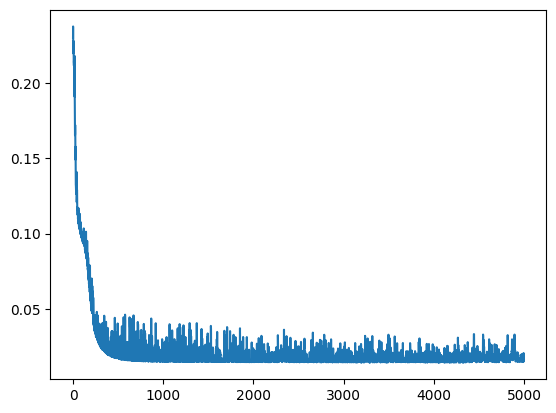

In [ ]:
N_i = 3; N_h = 2; N_o = 3 

result = mlp(r_i, r_d, N_i, N_h, N_o, training_steps=5000, lr=0.8, batch_size=10)
plt.plot(result[0])

In [ ]:
np.round(result[1].T[0], 4), np.where(result[1].T[0] == result[1].T[0].max())

(array([[0.9928, 0.0044, 0.    ]]), (array([0]), array([0])))

In [ ]:
np.round(result[1].T[1], 4) / np.round(result[1].T[1], 4).sum()

array([[0.0013871 , 0.70732191, 0.29129099]])

In [ ]:
np.round(result[1].T[:10], 16).sum(axis=1)

array([0.99719411, 1.00916948, 1.00798651, 0.99738145, 1.0100342 ,
       0.99928684, 1.01016182, 1.01058806, 0.99955238, 0.99955642])

In [ ]:
np.round(result[1].T[:10], 2)

array([[0.99, 0.  , 0.  ],
       [0.  , 0.71, 0.29],
       [0.01, 0.95, 0.05],
       [0.99, 0.  , 0.  ],
       [0.01, 0.98, 0.02],
       [0.  , 0.04, 0.96],
       [0.01, 0.98, 0.02],
       [0.  , 0.72, 0.29],
       [0.  , 0.02, 0.98],
       [0.  , 0.02, 0.98]])

In [ ]:
np.where(result[1].T[1] == result[1].T[1].max())

(array([0]), array([1]))

In [ ]:
y_pred = [np.where(result[1].T[i] == result[1].T[i].max())[1][0] for i in range(len(y_train))]
y_pred[:5]

[0, 1, 1, 0, 1]

<AxesSubplot:>

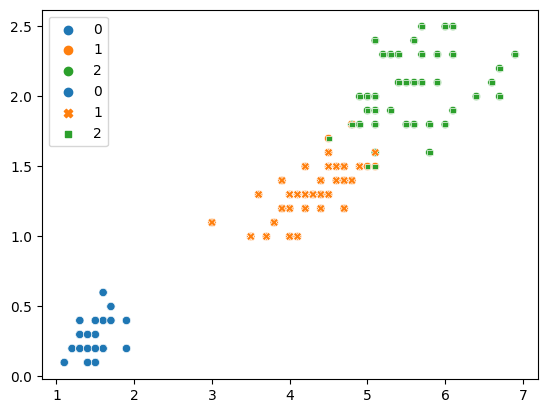

In [ ]:
# Predicted by the model, mlp (modeled) class
sns.scatterplot(x=X_train[:,0], y=X_train[:,1], hue=y_pred, 
    palette=sns.color_palette("tab10")[:3])

# This is the true (observed) class
sns.scatterplot(x=X_train[:,0], y=X_train[:,1], hue=y_train, style=y_train,
    palette=sns.color_palette("tab10")[:3])

In [ ]:
confusion_matrix = np.zeros((3, 3), dtype='int')
for i,j in zip(y_train, y_pred):
    confusion_matrix[i][j]+=1
confusion_matrix

array([[40,  0,  0],
       [ 0, 38,  2],
       [ 0,  3, 37]])

Text(0.5, 23.52222222222222, 'Predicted class')

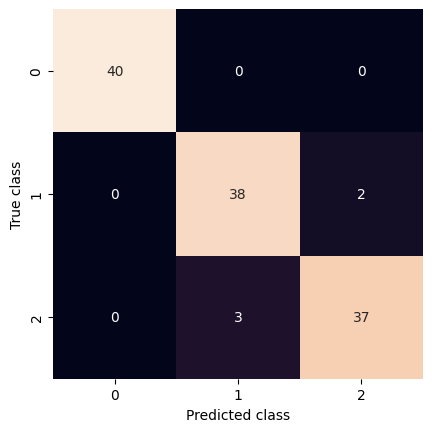

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_train, y_pred)
sns.heatmap(cm, square=True, annot=True, cbar=False, fmt='d')
plt.ylabel("True class")
plt.xlabel("Predicted class")

In [ ]:
cm.diagonal().sum() / cm.sum(), 5/120

(0.9583333333333334, 0.041666666666666664)

In [ ]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.93      0.95      0.94        40
           2       0.95      0.93      0.94        40

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



Ver: 
- https://en.wikipedia.org/wiki/Precision_and_recall
- https://medium.com/mini-distill/effect-of-batch-size-on-training-dynamics-21c14f7a716e

In [ ]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled = np.concatenate((X_test_scaled, np.ones((30,1))), axis=1)
r_i = np.matrix(X_test_scaled.transpose())
X_test_scaled[:5]

array([[0.03448276, 0.04166667, 1.        ],
       [0.65517241, 0.70833333, 1.        ],
       [0.37931034, 0.375     , 1.        ],
       [0.37931034, 0.375     , 1.        ],
       [0.03448276, 0.04166667, 1.        ]])

In [ ]:
def mlp_predict(r_i, w_h, w_o):
    # Test all patterns
    #r_o_test = 1 / (1 + np.exp(-w_o*(1/(1+np.exp(-w_h*r_i)))))
    rht = 1 / (1 + np.exp(-w_h*r_i))
    rht[-1] = 1
    r_o_test = 1 / (1 + np.exp(-w_o*rht))
    return r_o_test

# predict on test set
result_test = mlp_predict(r_i, result[2], result[3])
y_pred_test = [np.where(result_test.T[i] == result_test.T[i].max())[1][0] 
    for i in range(len(y_test))]
y_pred_test[:5]

[0, 2, 1, 1, 0]

<AxesSubplot:>

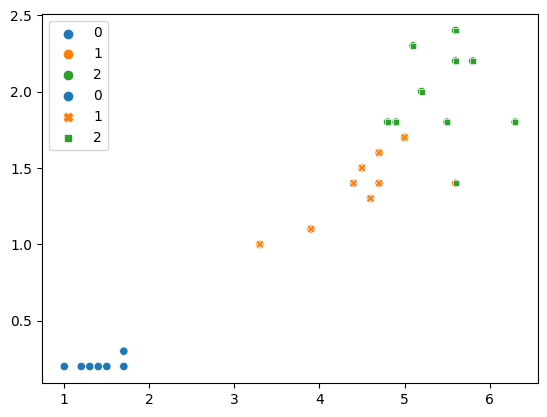

In [ ]:
# Predicted by the model, mlp (modeled) class
sns.scatterplot(x=X_test[:,0], y=X_test[:,1], hue=y_pred_test, 
    palette=sns.color_palette("tab10")[:3])

# This is the true (observed) class
sns.scatterplot(x=X_test[:,0], y=X_test[:,1], hue=y_test, style=y_test,
    palette=sns.color_palette("tab10")[:3])

Text(0.5, 23.52222222222222, 'Predicted class')

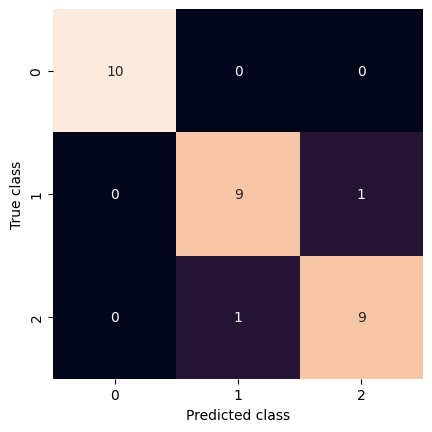

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, square=True, annot=True, cbar=False, fmt='d')
plt.ylabel("True class")
plt.xlabel("Predicted class")

In [ ]:
print(classification_report(y_test, y_pred_test))
2/30

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



0.06666666666666667

In [ ]:
x_min, y_min = X.min(axis=0)
x_max, y_max = X.max(axis=0)
x_min, y_min, x_max, y_max

(1.0, 0.1, 6.9, 2.5)

In [ ]:
gX = np.linspace(x_min, x_max, 100)
gY = np.linspace(y_min, y_max, 100)

gData = np.concatenate((gX.reshape(-1,1), gY.reshape(-1,1)), axis=1)
gData_scaled = scaler.transform(gData)

gData_scaled = np.concatenate((gData_scaled, np.ones((100,1))), axis=1)
r_i = np.matrix(gData_scaled.transpose())

result_test = mlp_predict(r_i, result[2], result[3])
y_pred = [np.where(result_test.T[i] == result_test.T[i].max())[1][0] for i in range(100)]

In [ ]:
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

In [ ]:
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
                     
Xgd = gData_scaled[:,0]
Ygd = gData_scaled[:,1]

Z = []
for xi in Xgd:
    for yi in Ygd:
        z_result = mlp_predict(np.array([[xi, yi, 1]]).T, result[2], result[3])
        #Z += [np.where(z_result == z_result.max())[0][0]]
        Z += [z_result[1]]

<AxesSubplot:>

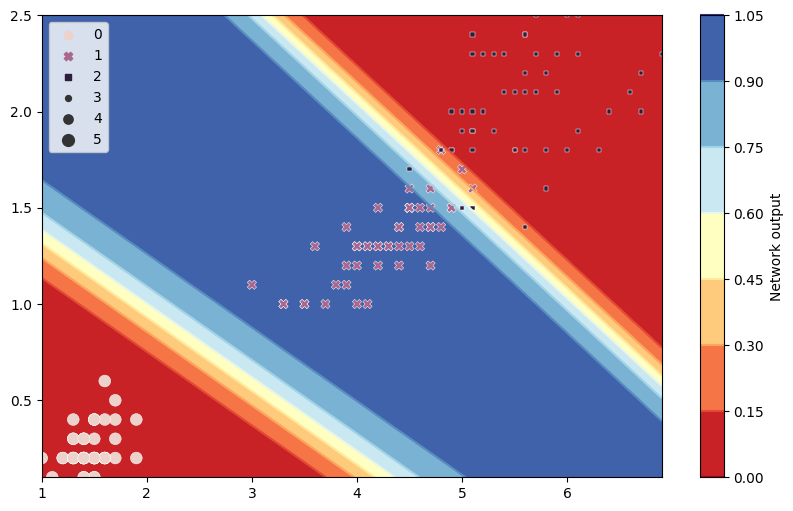

In [ ]:
plt.figure(figsize=(10,6))
Z = np.array(Z)
Z = Z.reshape(xx.shape)

# Plot contour
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
csl = plt.contour(xx, yy, Z, cmap=plt.cm.RdYlBu)

# Make a colorbar for the cs returned by the contourf call.
cbar = plt.colorbar(cs)
cbar.ax.set_ylabel('Network output')
# Add the contour line levels to the colorbar
cbar.add_lines(csl)

sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, style=y, size=5-y)

See: 
  - https://web.cs.dal.ca/~tt/fundamentals/programs/Octave/Chapter6/
  - https://www.mathworks.com/academia/books/fundamentals-of-computational-neuroscience-trappenberg.html

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cce3455d-da08-4c10-a6fe-39f2a30c6a51' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>